## GATHER

> The first thing thing we do before running any code in this noebook would be importing the neccessary packages needed for this analysis.

In [118]:
# importing statements for all the packages needed for this analysis
import pandas as pd
import json
import requests
import numpy as np
import os
import matplotlib.pyplot as plt

**Next step is laoding the datasets i will be working with**
> First step is to load my first dataset called Twiiter Archive

In [119]:
# Loading my first dataset
twitter_archive = pd.read_csv(r"C:\Users\DIOH\Desktop\UDACITY\PROJECT 2\twitter-archive-enhanced.csv")

**Next step is loading my 2nd datasets called Tweet Image Predictions**
> Step 1: Create a folder 

> Use OS method to check if a folder exists and create a new one if it doesn't.

In [120]:
# Make directory if it doesn't already exist
folder_name = r'C:\Users\DIOH\Desktop\UDACITY\PROJECT 2\image predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

> Step 2: Create the Request

> Define the url and use the requests.get method

In [122]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [ ]:
# in order to view the body of the file, we use .content
response.content

Step 3: Access the Content and Write to a File
> Here we Use the response.content method and some basic file I/O to save this file to our computer

In [123]:
#to save this file to our computer, we use response.content and some basic i/o file.
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [124]:
# lets check the content of our folder image predictions
os.listdir(folder_name)

['image-predictions.tsv']

In [125]:
# Reading the tsv file into a pandas dataframe

tweet_images = pd.read_csv("C:/Users/DIOH\Desktop/UDACITY\PROJECT 2/image predictions/image-predictions.tsv", sep = '\t')

**Next step is to load our 3rd dataset** 

In [126]:
# loading our tweet_json txt file
tweets = pd.read_json(r'C:\Users\DIOH\Desktop\UDACITY\PROJECT 2\tweet-json.txt', lines = True)

**For the tweet_json.txt dataset. My columns of interest are the retweet_id, retweet_count and favorite_count.**
> These 3 columns would be extracted from the dataset by reading each line of the tweet. A new dataframe called tweet_count would be created which will contain these 3 columns. 

In [127]:
#list of dictionaries to build file
df_list = []
# Reading the txt file
with open('tweet-json.txt', 'r') as json_file:
          for line in json_file.readlines():
            each_tweet_line = json.loads(line)
            tweet_id = each_tweet_line['id']
            retweet_count = each_tweet_line['retweet_count']
            favorite_count = each_tweet_line['favorite_count']
#append to list of dictionaries
            df_list.append({'tweet_id': tweet_id,
                            'retweet_count': retweet_count,
                            'favorite_count': favorite_count})
#creating a new dataframe called tweet_count
tweet_count = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


### ACCESS

In [128]:
#viewing our dataframe
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [129]:
# viewing our dataframe
tweet_images

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [130]:
tweets

created_at                  id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2349 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2350 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2351 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2352 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2353 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
0     This is Phineas. He's a mystical boy. Only eve...      False   
1     This is Tilly. She's just checking pup on you....      False   
2     This is Archie. He is a rare Norwegian Pouncin...      False   
3     This is Darla. She commenced a snooze mid meal...      False   
4     This is Franklin. He would like you to stop ca...      False   
...                                                 ...        ...   
2349  Here we have a 1949 1st generation vulpix. Enj...      False   
2350  This is a purebred Piers Morgan. Loves to Netf...      False   
2351  Here is a very happy pup. Big fan of well-main...      False   
2352  This is a western brown Mitsubishi terrier. Up...      False   
2353  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
0               [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1              [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2              [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3               [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4              [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
...                 ...                                                ...   
2349           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2350           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2351           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2352           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2353           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
0     {'media': [{'id': 892420639486877696, 'id_str'...   
1     {'media': [{'id': 892177413194625024, 'id_str'...   
2     {'media': [{'id': 891815175371796480, 'id_str'...   
3     {'media': [{'id': 891689552724799489, 'id_str'...   
4     {'media': [{'id': 891327551943041024, 'id_str'...   
...                                                 ...   
2349  {'media': [{'id': 666049244999131136, 'id_str'...   
2350  {'media': [{'id': 666044217047650304, 'id_str'...   
2351  {'media': [{'id': 666033409081393153, 'id_str'...   
2352  {'media': [{'id': 666029276303482880, 'id_str'...   
2353  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2349  <a href="http://twitter.com/download/iphone" r...   
2350  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r..

In [131]:
# viewing our dataframe
tweet_count

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

In [132]:
# Chekcing the basic information of our data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [133]:
# Chekcing the basic information of our data
tweet_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [134]:
# Chekcing the basic information of our data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [135]:
# Chekcing for duplicates in the 3 datsets
all_columns = pd.Series(list(twitter_archive) + list(tweet_images) + list(tweets))
all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

In [136]:
#checking for null values
twitter_archive.name.isnull().sum()

0

In [137]:
# checking the value count of our name column
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [138]:
# Descriptive Statistics for each column of data

twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [139]:
# Descriptive Statistics for each column of data

tweet_images.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [140]:
# Descriptive Statistics for each column of data

tweets.describe()

id        id_str  in_reply_to_status_id  \
count  2.354000e+03  2.354000e+03           7.800000e+01   
mean   7.426978e+17  7.426978e+17           7.455079e+17   
std    6.852812e+16  6.852812e+16           7.582492e+16   
min    6.660209e+17  6.660209e+17           6.658147e+17   
25%    6.783975e+17  6.783975e+17           6.757419e+17   
50%    7.194596e+17  7.194596e+17           7.038708e+17   
75%    7.993058e+17  7.993058e+17           8.257804e+17   
max    8.924206e+17  8.924206e+17           8.862664e+17   

       in_reply_to_status_id_str  in_reply_to_user_id  \
count               7.800000e+01         7.800000e+01   
mean                7.455079e+17         2.014171e+16   
std                 7.582492e+16         1.252797e+17   
min                 6.658147e+17         1.185634e+07   
25%                 6.757419e+17         3.086374e+08   
50%                 7.038708e+17         4.196984e+09   
75%                 8.257804e+17         4.196984e+09   
max                 8.862664e+17         8.405479e+17   

       in_reply_to_user_id_str  geo  coordinates  contributors  retweet_count  \
count             7.800000e+01  0.0          0.0           0.0    2354.000000   
mean              2.014171e+16  NaN          NaN           NaN    3164.797366   
std               1.252797e+17  NaN          NaN           NaN    5284.770364   
min               1.185634e+07  NaN          NaN           NaN       0.000000   
25%               3.086374e+08  NaN          NaN           NaN     624.500000   
50%               4.196984e+09  NaN          NaN           NaN    1473.500000   
75%               4.196984e+09  NaN          NaN           NaN    3652.000000   
max               8.405479e+17  NaN          NaN           NaN   79515.000000   

       favorite_count  possibly_sensitive  possibly_sensitive_appealable  \
count     2354.000000              2211.0                         2211.0   
mean      8080.968564                 0.0                            0.0   
std      11814.771334                 0.0                            0.0   
min          0.000000                 0.0                            0.0   
25%       1415.000000                 0.0                            0.0   
50%       3603.500000                 0.0                            0.0   
75%      10122.250000                 0.0                            0.0   
max     132810.000000                 0.0                            0.0   

       quoted_status_id  quoted_status_id_str  
count      2.900000e+01          2.900000e+01  
mean       8.162686e+17          8.162686e+17  
std        6.164161e+16          6.164161e+16  
min        6.721083e+17          6.721083e+17  
25%        7.888183e+17          7.888183e+17  
50%        8.340867e+17          8.340867e+17  
75%        8.664587e+17          8.664587e+17  
max        8.860534e+17          8.860534e+17

In [141]:
# checking for duplicates in our twitter archive dataset
twitter_archive.tweet_id.duplicated().sum()

0

In [142]:
# checking for duplicates in our tweet images dataset
tweet_images.tweet_id.duplicated().sum()

0

In [143]:
# viewing our datasets randomly
tweets.sample(10)

created_at                  id              id_str  \
1581 2016-01-13 02:43:46+00:00  687102708889812993  687102708889812992   
931  2016-07-14 18:22:23+00:00  753655901052166144  753655901052166144   
90   2017-06-13 01:14:41+00:00  874434818259525634  874434818259525632   
649  2016-10-31 00:20:11+00:00  792883833364439040  792883833364439040   
172  2017-04-30 00:02:42+00:00  858471635011153920  858471635011153920   
853  2016-08-14 16:13:27+00:00  764857477905154048  764857477905154048   
1102 2016-05-24 15:55:00+00:00  735137028879360001  735137028879360000   
1978 2015-12-05 03:05:49+00:00  672975131468300288  672975131468300288   
1207 2016-04-01 00:26:15+00:00  715696743237730304  715696743237730304   
1267 2016-03-14 23:19:03+00:00  709519240576036864  709519240576036864   

                                              full_text  truncated  \
1581  Army of water dogs here. None of them know whe...      False   
931   "The dogtor is in hahahaha no but seriously I'...      False   
90    RT @dog_rates: This is Coco. At first I though...      False   
649   This is Bailey. She's rather h*ckin hype for H...      False   
172   This is Sophie. She just arrived. Used paworit...      False   
853   This is Aubie. He has paws for days. Nibbling ...      False   
1102  Meet Buckley. His family &amp; some neighbors ...      False   
1978  This is Chuckles. He is one skeptical pupper. ...      False   
1207  Meet Toby. He's a Lithuanian High-Steppin Stic...      False   
1267  This is Vince. He's a Gregorian Flapjeck. Whit...      False   

     display_text_range                                           entities  \
1581           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
931            [0, 108]  {'hashtags': [], 'symbols': [], 'user_mentions...   
90             [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
649            [0, 100]  {'hashtags': [], 'symbols': [], 'user_mentions...   
172            [0, 113]  {'hashtags': [], 'symbols': [], 'user_mentions...   
853            [0, 116]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1102           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1978            [0, 94]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1207           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1267           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
1581  {'media': [{'id': 687102703005265921, 'id_str'...   
931   {'media': [{'id': 753655892701249536, 'id_str'...   
90                                                  NaN   
649   {'media': [{'id': 792883812854292481, 'id_str'...   
172   {'media': [{'id': 858471621065150464, 'id_str'...   
853   {'media': [{'id': 764857472309948416, 'id_str'...   
1102  {'media': [{'id': 735137021832888320, 'id_str'...   
1978  {'media': [{'id': 672975080402628609, 'id_str'...   
1207  {'media': [{'id': 715696738036744192, 'id_str'...   
1267  {'media': [{'id': 709519225661091845, 'id_str'...   

                                                 source  \
1581  <a href="http://twitter.com/download/iphone" r...   
931   <a href="http://twitter.com/download/iphone" r...   
90    <a href="http://twitter.com/download/iphone" r...   
649   <a href="http://twitter.com/download/iphone" r...   
172   <a href="http://twitter.com/download/iphone" r...   
853   <a href="http://twitter.com/download/iphone" r...   
1102  <a href="http://twitter.com/download/iphone" r...   
1978  <a href="http://twitter.com/download/iphone" r...   
1207  <a href="http://twitter.com/download/iphone" r...   
1267  <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id  ...  favorite_count  favorited  retweeted  \
1581                    NaN  ...            2571      False      False   
931                     NaN  ...            6458      False      False   
90                      NaN  ...               0     

### Quality issues

**twitter_archive table**

> 1. Erroneous datatype assigned to Timestamp
> 2. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id. These mentioned columns have   missing ids represented as null values.
> 3. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id. These mentioned columns are not relevant to my analysis
> 4. Most of the columns in the dataset contain None
> 5. Floofer is not a dog stage
> 6. The name column contains "a" which is not a name
> 7. Source column contains tags

**tweet_images table**

> 1. Columns p1, p2, and p3 have inconsistencies with their case letters
> 2. p1 contains underscores



### Tidiness issue


> 1. tweet_id, source, in_reply_to_status_id, in_reply_to_user_id. These columns are duplicated across the 3 datasets
> 2. Doggo, pupper,puppo are dog stages in 3 different columns


### CLEANING DATA

In [144]:
# Make copies of all your datasets
T_archive_clean = twitter_archive.copy()
T_images_clean = tweet_images.copy()
tweets_clean = tweets.copy()
tweet_count = tweet_count.copy()

### Define
**Most of the columns in the dataset contain None**
> Replace the none values with NaN

### Code

In [145]:
#Replacing None with NaN
T_archive_clean.replace('None', np.nan, inplace = True)



### Test

In [146]:
# confirming changes
T_archive_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

### Define
**Erroneous datatype assigned to timestamp**
> convert the object datatype to datetime

### Code

In [147]:
#convert to Datetime 
T_archive_clean['timestamp'] = pd.to_datetime(T_archive_clean['timestamp'])

### Test

In [148]:
#confirming changes
T_archive_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### Define
**in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id. These mentioned columns have missing ids represented as null values** 
> Remove the null values. 

### Code

In [149]:
# removing the null values
T_archive_clean = T_archive_clean[T_archive_clean.in_reply_to_status_id.isnull()]
T_archive_clean = T_archive_clean[T_archive_clean.retweeted_status_id.isnull()]

### Test

In [150]:
# confirming changes
T_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Define
**in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id. These mentioned columns are not relevant to my analysis** 
> These columns also contain retweets which for the purpose of this analysis, are not needed Hence making them irrelevant to my analysis, so I will drop them.

### code

In [151]:
 # drop columns not relevant to us from this table
T_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [152]:
#confirming our changes
T_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1494 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3

### Define
**Doggo, pupper,puppo are dog stages in 3 different columns**
> Combine the 3 columns into one column called Dog_stage

### Code

In [153]:
# combining and dropping the required the columns
T_archive_clean['dog_stage'] = T_archive_clean[['doggo', 'pupper', 'puppo']].apply(lambda y: ','.join(y.dropna().astype(str)), axis = 1)

T_archive_clean.drop(['doggo', 'pupper', 'puppo'], axis=1, inplace = True)

### Test

In [154]:
# confirming our changes
T_archive_clean.sample(5)

tweet_id                 timestamp  \
912   757596066325864448 2016-07-25 15:19:12+00:00   
814   771014301343748096 2016-08-31 15:58:28+00:00   
2037  671561002136281088 2015-12-01 05:26:34+00:00   
905   758099635764359168 2016-07-27 00:40:12+00:00   
1221  714485234495041536 2016-03-28 16:12:09+00:00   

                                                 source  \
912   <a href="http://twitter.com/download/iphone" r...   
814   <a href="http://twitter.com/download/iphone" r...   
2037  <a href="http://twitter.com/download/iphone" r...   
905   <a href="http://vine.co" rel="nofollow">Vine -...   
1221  <a href="http://vine.co" rel="nofollow">Vine -...   

                                                   text  \
912   Here's another picture without a dog in it. Id...   
814   Another pic without a dog in it? What am I sup...   
2037  This is the best thing I've ever seen so sprea...   
905   In case you haven't seen the most dramatic sne...   
1221  This is Blitz. He screams. 10/10 (vid by @yeaa...   

                                          expanded_urls  rating_numerator  \
912   https://twitter.com/dog_rates/status/757596066...                 4   
814   https://twitter.com/dog_rates/status/771014301...                 7   
2037  https://twitter.com/dog_rates/status/671561002...                13   
905                       https://vine.co/v/hQJbaj1VpIz                13   
1221                      https://vine.co/v/iDrOvVqq0A6                10   

      rating_denominator   name floofer dog_stage  
912                   10    NaN     NaN            
814                   10    NaN     NaN            
2037                  10    the     NaN            
905                   10    NaN     NaN            
1221                  10  Blitz     NaN

### Test

In [155]:
# confirming the value count of our dog stage
T_archive_clean.dog_stage.value_counts()

                1770
pupper           221
doggo             73
puppo             23
doggo,pupper       9
doggo,puppo        1
Name: dog_stage, dtype: int64

### Test

In [156]:
# Confirming that the dog stage column has no null values
T_archive_clean['dog_stage'].notnull().sum()

2097

### Code

In [157]:
# replacing every empty string in the dog stage column with nan

T_archive_clean.dog_stage.replace('', np.nan, inplace = True)

### Test

In [158]:
# confirming our changes
T_archive_clean.dog_stage.value_counts()

pupper          221
doggo            73
puppo            23
doggo,pupper      9
doggo,puppo       1
Name: dog_stage, dtype: int64

### Define
**Floofer is not a dog stage**
> For the purpose of this analyis, this column is not needed. lets drop the column

### Code

In [159]:
# dropping the column floofer
T_archive_clean.drop(['floofer'], axis = 1, inplace=True)

### Test

In [160]:
# confirming changes
list(T_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

### Define
**The name column contains 'a' which is not a name**
> The value a should be replaced with a null value

### Code

In [161]:
# Replacing'a' with a null value
T_archive_clean['name'].replace('a', 'NaN', inplace = True)

### Test

In [162]:
# confirm changes
T_archive_clean

tweet_id                 timestamp  \
0     892420643555336193 2017-08-01 16:23:56+00:00   
1     892177421306343426 2017-08-01 00:17:27+00:00   
2     891815181378084864 2017-07-31 00:18:03+00:00   
3     891689557279858688 2017-07-30 15:58:51+00:00   
4     891327558926688256 2017-07-29 16:00:24+00:00   
...                  ...                       ...   
2351  666049248165822465 2015-11-16 00:24:50+00:00   
2352  666044226329800704 2015-11-16 00:04:52+00:00   
2353  666033412701032449 2015-11-15 23:21:54+00:00   
2354  666029285002620928 2015-11-15 23:05:30+00:00   
2355  666020888022790149 2015-11-15 22:32:08+00:00   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2351  Here we have a 1949 1st generation vulpix. Enj...   
2352  This is a purebred Piers Morgan. Loves to Netf...   
2353  Here is a very happy pup. Big fan of well-main...   
2354  This is a western brown Mitsubishi terrier. Up...   
2355  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name dog_stage  
0                     10   Phineas       NaN  
1                     10     Tilly       NaN  
2                     10    Archie       NaN  
3                     10     Darla       NaN  
4                     10  Franklin       NaN  
...                  ...       ...       ...  
2351                  10       NaN       NaN  
2352                  10       NaN       NaN  
2353                  10       NaN       NaN  
2354                  10       NaN       NaN  
2355                  10       NaN       NaN  

[2097 rows x 9 columns]

### Define
**Source column contains tags**
> Extract the keywords from the tags. So as to make our source plain and readable.

In [163]:
### Code

In [164]:
#Extracting our keywords
T_archive_clean['source'] = T_archive_clean.source.str.extract(r'(Twitter for iPhone|Vine|Twitter Web Client|TweetDeck)', expand=True)

In [165]:
### Test

In [166]:
T_archive_clean

tweet_id                 timestamp              source  \
0     892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1     892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2     891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3     891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4     891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   
...                  ...                       ...                 ...   
2351  666049248165822465 2015-11-16 00:24:50+00:00  Twitter for iPhone   
2352  666044226329800704 2015-11-16 00:04:52+00:00  Twitter for iPhone   
2353  666033412701032449 2015-11-15 23:21:54+00:00  Twitter for iPhone   
2354  666029285002620928 2015-11-15 23:05:30+00:00  Twitter for iPhone   
2355  666020888022790149 2015-11-15 22:32:08+00:00  Twitter for iPhone   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2351  Here we have a 1949 1st generation vulpix. Enj...   
2352  This is a purebred Piers Morgan. Loves to Netf...   
2353  Here is a very happy pup. Big fan of well-main...   
2354  This is a western brown Mitsubishi terrier. Up...   
2355  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name dog_stage  
0                     10   Phineas       NaN  
1                     10     Tilly       NaN  
2                     10    Archie       NaN  
3                     10     Darla       NaN  
4                     10  Franklin       NaN  
...                  ...       ...       ...  
2351                  10       NaN       NaN  
2352                  10       NaN       NaN  
2353                  10       NaN       NaN  
2354                  10       NaN       NaN  
2355                  10       NaN       NaN  

[2097 rows x 9 columns]

### Define
**columns p1, p2, and p3 have inconsistencies with their case letters**
> Change every letters in these columns to lowercase

### Code

In [167]:
#changing to lower case
T_images_clean['p1'] = T_images_clean['p1'].str.lower()
T_images_clean['p2'] = T_images_clean['p2'].str.lower()
T_images_clean['p3'] = T_images_clean['p3'].str.lower()

#### Test

In [168]:
T_images_clean

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         german_shepherd  0.596461    True            malinois   
3           1     rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    english_springer   
2071        1             paper_towel  0.170278   False  labrador_retriever   
2072        1               chihuahua  0.716012    True            malamute   
2073        1               chihuahua  0.323581    True            pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            shetland_sheepdog  0.061428    True  
1     0.074192    True          rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  german_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

### Define
**p1 contains underscrores**
> Replace the underscores with an empty string

### Code

In [169]:
# Replacing underscores with an empty string
T_images_clean['p1'] = T_images_clean['p1'].str.replace('_', " ")

### Test

In [170]:
#confirm changes
T_images_clean

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  welsh springer spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         german shepherd  0.596461    True            malinois   
3           1     rhodesian ridgeback  0.408143    True             redbone   
4           1      miniature pinscher  0.560311    True          rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    english_springer   
2071        1             paper towel  0.170278   False  labrador_retriever   
2072        1               chihuahua  0.716012    True            malamute   
2073        1               chihuahua  0.323581    True            pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            shetland_sheepdog  0.061428    True  
1     0.074192    True          rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  german_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

### Define
**For the purpose of my analysis.The 2nd (p2) and 3rd (p3) predictions are not needed**
> drop the columns containing 2nd and 3rd predictions.

### Code

In [171]:
# dropping cloumns
T_images_clean = T_images_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

### Test

In [172]:
#confirm changes
T_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


### Define
**tweet_id, source, in_reply_to_status_id, in_reply_to_user_id. These columns are duplicated across the 3 datasets**

> in_reply_to_status_id and in_reply_to_user_id cloumns have been dropped already,as they are not relevant to my analysis. The source column in the tweets dataset would be neglected since we are no longer working with that dataset.

### Define
**Merging our 3 datasets**
> Merge the 3 cleaned colums

### Code

In [173]:
# merging using pd.merge
twitter_archive_master = pd.merge(T_archive_clean, tweet_count, on = 'tweet_id', how = 'left')
twitter_archive_master = pd.merge(twitter_archive_master, T_images_clean, on = 'tweet_id', how = 'left')

### Test

In [174]:
# confirming changes
twitter_archive_master.head()

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  retweet_count  favorite_count  \
0                  10   Phineas       NaN           8853           39467   
1                  10     Tilly       NaN           6514           33819   
2                  10    Archie       NaN           4328           25461   
3                  10     Darla       NaN           8964           42908   
4                  10  Franklin       NaN           9774           41048   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0    chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0    chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0  paper towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0       basset   

    p1_conf p1_dog  
0  0.097049  False  
1  0.323581   True  
2  0.716012   True  
3  0.170278  False  
4  0.555712   True

### STORING DATA

In [175]:
twitter_archive_master.to_csv('C:/Users/DIOH/Desktop/UDACITY/twitter-archive-master.csv', index=False)

## ANALYSING AND VISUALIZING DATA 

In [176]:
# loaading our master dataset
df = pd.read_csv('C:/Users/DIOH/Desktop/UDACITY/twitter-archive-master.csv')

In [177]:
# viewing our master dataset
df

tweet_id                  timestamp              source  \
0     892420643555336193  2017-08-01 16:23:56+00:00  Twitter for iPhone   
1     892177421306343426  2017-08-01 00:17:27+00:00  Twitter for iPhone   
2     891815181378084864  2017-07-31 00:18:03+00:00  Twitter for iPhone   
3     891689557279858688  2017-07-30 15:58:51+00:00  Twitter for iPhone   
4     891327558926688256  2017-07-29 16:00:24+00:00  Twitter for iPhone   
...                  ...                        ...                 ...   
2092  666049248165822465  2015-11-16 00:24:50+00:00  Twitter for iPhone   
2093  666044226329800704  2015-11-16 00:04:52+00:00  Twitter for iPhone   
2094  666033412701032449  2015-11-15 23:21:54+00:00  Twitter for iPhone   
2095  666029285002620928  2015-11-15 23:05:30+00:00  Twitter for iPhone   
2096  666020888022790149  2015-11-15 22:32:08+00:00  Twitter for iPhone   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2092  Here we have a 1949 1st generation vulpix. Enj...   
2093  This is a purebred Piers Morgan. Loves to Netf...   
2094  Here is a very happy pup. Big fan of well-main...   
2095  This is a western brown Mitsubishi terrier. Up...   
2096  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2092  https://twitter.com/dog_rates/status/666049248...                 5   
2093  https://twitter.com/dog_rates/status/666044226...                 6   
2094  https://twitter.com/dog_rates/status/666033412...                 9   
2095  https://twitter.com/dog_rates/status/666029285...                 7   
2096  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name dog_stage  retweet_count  favorite_count  \
0                     10   Phineas       NaN           8853           39467   
1                     10     Tilly       NaN           6514           33819   
2                     10    Archie       NaN           4328           25461   
3                     10     Darla       NaN           8964           42908   
4                     10  Franklin       NaN           9774           41048   
...                  ...       ...       ...            ...             ...   
2092                  10       NaN       NaN             41             111   
2093                  10       NaN       NaN            147             311   
2094                  10       NaN       NaN             47             128   
2095                  10       NaN       NaN             48             132   
2096                  10       NaN       NaN            532            2535   

                                              jpg_url  img_num  \
0     https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0   
1     https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2     https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
3     https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0   
4     https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   
...                                               ...      ...   
2092  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg      1.0   
2093

### Insights

**Question 1: Are all the dogs real dogs?** 
> Do a value count of the dog predictions to find out 

In [178]:
# value counts of the dog prediction column (p1_dog)
df.p1_dog.value_counts()

True     1463
False     508
Name: p1_dog, dtype: int64

**From the value counts of our dog prediction column (p1_dog), we can clearly see that some of the dogs are not actual dogs.For the purpose of this analysis,filter the table and work with only data that has its dog prediction as True.**


In [179]:
# filtering and creating a dataframe to reflect only True in the p1_dog column. Lets call our new dataframe Actual Dogs.

actual_dogs = df.query('p1_dog == True')

# confirming changes
actual_dogs

tweet_id                  timestamp              source  \
1     892177421306343426  2017-08-01 00:17:27+00:00  Twitter for iPhone   
2     891815181378084864  2017-07-31 00:18:03+00:00  Twitter for iPhone   
4     891327558926688256  2017-07-29 16:00:24+00:00  Twitter for iPhone   
5     891087950875897856  2017-07-29 00:08:17+00:00  Twitter for iPhone   
6     890971913173991426  2017-07-28 16:27:12+00:00  Twitter for iPhone   
...                  ...                        ...                 ...   
2092  666049248165822465  2015-11-16 00:24:50+00:00  Twitter for iPhone   
2093  666044226329800704  2015-11-16 00:04:52+00:00  Twitter for iPhone   
2094  666033412701032449  2015-11-15 23:21:54+00:00  Twitter for iPhone   
2095  666029285002620928  2015-11-15 23:05:30+00:00  Twitter for iPhone   
2096  666020888022790149  2015-11-15 22:32:08+00:00  Twitter for iPhone   

                                                   text  \
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
4     This is Franklin. He would like you to stop ca...   
5     Here we have a majestic great white breaching ...   
6     Meet Jax. He enjoys ice cream so much he gets ...   
...                                                 ...   
2092  Here we have a 1949 1st generation vulpix. Enj...   
2093  This is a purebred Piers Morgan. Loves to Netf...   
2094  Here is a very happy pup. Big fan of well-main...   
2095  This is a western brown Mitsubishi terrier. Up...   
2096  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
4     https://twitter.com/dog_rates/status/891327558...                12   
5     https://twitter.com/dog_rates/status/891087950...                13   
6     https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
...                                                 ...               ...   
2092  https://twitter.com/dog_rates/status/666049248...                 5   
2093  https://twitter.com/dog_rates/status/666044226...                 6   
2094  https://twitter.com/dog_rates/status/666033412...                 9   
2095  https://twitter.com/dog_rates/status/666029285...                 7   
2096  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name dog_stage  retweet_count  favorite_count  \
1                     10     Tilly       NaN           6514           33819   
2                     10    Archie       NaN           4328           25461   
4                     10  Franklin       NaN           9774           41048   
5                     10       NaN       NaN           3261           20562   
6                     10       Jax       NaN           2158           12041   
...                  ...       ...       ...            ...             ...   
2092                  10       NaN       NaN             41             111   
2093                  10       NaN       NaN            147             311   
2094                  10       NaN       NaN             47             128   
2095                  10       NaN       NaN             48             132   
2096                  10       NaN       NaN            532            2535   

                                              jpg_url  img_num  \
1     https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2     https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
4     https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   
5     https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg      1.0   
6     https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg      1.0   
...                                               ...      ...   
2092  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg      1.0   
2093

**Question 2: Are all the rating denominators 10? Do we have values <10?**
> Query the dataframe to find out if there are rating denominators less than 10


In [180]:
# creating  a new dataframe with rating denominator less than 10
lower_denom = actual_dogs.query('rating_denominator < 10' )
lower_denom

tweet_id                  timestamp              source  \
403   810984652412424192  2016-12-19 23:06:23+00:00  Twitter for iPhone   
2076  666287406224695296  2015-11-16 16:11:11+00:00  Twitter for iPhone   

                                                   text  \
403   Meet Sam. She smiles 24/7 &amp; secretly aspir...   
2076  This is an Albanian 3 1/2 legged  Episcopalian...   

                                          expanded_urls  rating_numerator  \
403   https://www.gofundme.com/sams-smile,https://tw...                24   
2076  https://twitter.com/dog_rates/status/666287406...                 1   

      rating_denominator name dog_stage  retweet_count  favorite_count  \
403                    7  Sam       NaN           1655            5927   
2076                   2   an       NaN             71             152   

                                              jpg_url  img_num  \
403   https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg      1.0   
2076  https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg      1.0   

                    p1   p1_conf p1_dog  
403   golden retriever  0.871342   True  
2076       maltese dog  0.857531   True

From the above result, we can clearly see that we have 2 dogs with rating denominator < 10. Also looking at the text and twitter urls we can establish this the ratings are wrong and therefore invalid. For the purpose of this analysis, we will filter out these values.

In [181]:
# creating a dataframe with rating denominator > 10
higher_denom = actual_dogs.query('rating_denominator >= 10')

higher_denom

tweet_id                  timestamp              source  \
1     892177421306343426  2017-08-01 00:17:27+00:00  Twitter for iPhone   
2     891815181378084864  2017-07-31 00:18:03+00:00  Twitter for iPhone   
4     891327558926688256  2017-07-29 16:00:24+00:00  Twitter for iPhone   
5     891087950875897856  2017-07-29 00:08:17+00:00  Twitter for iPhone   
6     890971913173991426  2017-07-28 16:27:12+00:00  Twitter for iPhone   
...                  ...                        ...                 ...   
2092  666049248165822465  2015-11-16 00:24:50+00:00  Twitter for iPhone   
2093  666044226329800704  2015-11-16 00:04:52+00:00  Twitter for iPhone   
2094  666033412701032449  2015-11-15 23:21:54+00:00  Twitter for iPhone   
2095  666029285002620928  2015-11-15 23:05:30+00:00  Twitter for iPhone   
2096  666020888022790149  2015-11-15 22:32:08+00:00  Twitter for iPhone   

                                                   text  \
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
4     This is Franklin. He would like you to stop ca...   
5     Here we have a majestic great white breaching ...   
6     Meet Jax. He enjoys ice cream so much he gets ...   
...                                                 ...   
2092  Here we have a 1949 1st generation vulpix. Enj...   
2093  This is a purebred Piers Morgan. Loves to Netf...   
2094  Here is a very happy pup. Big fan of well-main...   
2095  This is a western brown Mitsubishi terrier. Up...   
2096  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
4     https://twitter.com/dog_rates/status/891327558...                12   
5     https://twitter.com/dog_rates/status/891087950...                13   
6     https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
...                                                 ...               ...   
2092  https://twitter.com/dog_rates/status/666049248...                 5   
2093  https://twitter.com/dog_rates/status/666044226...                 6   
2094  https://twitter.com/dog_rates/status/666033412...                 9   
2095  https://twitter.com/dog_rates/status/666029285...                 7   
2096  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name dog_stage  retweet_count  favorite_count  \
1                     10     Tilly       NaN           6514           33819   
2                     10    Archie       NaN           4328           25461   
4                     10  Franklin       NaN           9774           41048   
5                     10       NaN       NaN           3261           20562   
6                     10       Jax       NaN           2158           12041   
...                  ...       ...       ...            ...             ...   
2092                  10       NaN       NaN             41             111   
2093                  10       NaN       NaN            147             311   
2094                  10       NaN       NaN             47             128   
2095                  10       NaN       NaN             48             132   
2096                  10       NaN       NaN            532            2535   

                                              jpg_url  img_num  \
1     https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2     https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
4     https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   
5     https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg      1.0   
6     https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg      1.0   
...                                               ...      ...   
2092  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg      1.0   
2093

Now we have a dataframe containing only dogs and without a rating denominator less than 10

**Question 3: Which dog rating has most of the ratings?**
> Do a value count of the rating numerator

In [182]:
higher_denom.rating_numerator.value_counts()

12     378
10     318
11     305
13     208
9      107
8       58
7       24
14      19
6       12
5       10
4        5
3        3
84       1
45       1
2        1
26       1
121      1
44       1
60       1
50       1
80       1
99       1
75       1
165      1
27       1
88       1
Name: rating_numerator, dtype: int64

From the value counts, we can see that most of the dogs got ratings below 20. just very few dogs got ratings above 20

**Question 4: Does it mean that the few dogs with numerator ratings above 20 has a higher retweet count and favourite count? What is the correlation between Retweet count, favorite count and Rating denominator?**
> Query the datasets to find out rating numerator < or > 25. Sort the retweet and favorite count using groupby. 

In [183]:
# get all numerator ratings greater than or equal to 20
higher_rates = higher_denom.query('rating_numerator >= 20')

In [184]:
# explore rating numerator >= 20 in the table
higher_rates.describe()

tweet_id  rating_numerator  rating_denominator  retweet_count  \
count  1.300000e+01         13.000000           13.000000      13.000000   
mean   7.258599e+17         74.153846           61.538462    1829.769231   
std    4.545573e+16         39.236136           41.401722    1831.685251   
min    6.758531e+17         26.000000           10.000000     247.000000   
25%    6.974630e+17         45.000000           40.000000     721.000000   
50%    7.106587e+17         75.000000           50.000000    1460.000000   
75%    7.584672e+17         88.000000           80.000000    1885.000000   
max    8.206902e+17        165.000000          150.000000    7069.000000   

       favorite_count    img_num    p1_conf  
count       13.000000  13.000000  13.000000  
mean      5633.000000   1.076923   0.668938  
std       5381.951753   0.277350   0.242024  
min       1879.000000   1.000000   0.371816  
25%       2634.000000   1.000000   0.438627  
50%       3201.000000   1.000000   0.667939  
75%       5316.000000   1.000000   0.872064  
max      20296.000000   2.000000   0.999885

In [185]:
# get all numerator ratings less than 20
lower_rates = higher_denom.query('rating_numerator < 20') 

In [186]:
# explore rating numerator < 20 in the table
lower_rates.describe()

tweet_id  rating_numerator  rating_denominator  retweet_count  \
count  1.448000e+03       1448.000000         1448.000000    1448.000000   
mean   7.410161e+17         10.904006           10.007597    2814.388812   
std    6.876293e+16          1.703214            0.264087    4803.683251   
min    6.660209e+17          2.000000           10.000000      16.000000   
25%    6.781969e+17         10.000000           10.000000     656.000000   
50%    7.160046e+17         11.000000           10.000000    1448.000000   
75%    7.960436e+17         12.000000           10.000000    3288.750000   
max    8.921774e+17         14.000000           20.000000   79515.000000   

       favorite_count      img_num      p1_conf  
count     1448.000000  1448.000000  1448.000000  
mean      9374.338398     1.214088     0.614214  
std      12689.477366     0.575732     0.260448  
min         81.000000     1.000000     0.044333  
25%       2212.000000     1.000000     0.390981  
50%       4547.000000     1.000000     0.615420  
75%      11914.000000     1.000000     0.850559  
max     132810.000000     4.000000     0.999956

- We can draw a stastical inference from the 2 results above. Ratings with lower numerator had an average retweet and favorite count of 2814.4 and 9374.3 respectively. while ratings with higher numerator had an average an average of 1829.8 and an average favorite count of 5633. 
- The Maximum retweets and favorite counts can be found in numerator ratings below 20
> Hence this clearly shows us that having a higher rating numerator does not translate to higher retweet and favorite counts

We can also confirm the above analysis by sorting our datasets using groupby

In [187]:
#sorting our dataframe
higher_rates.groupby(['retweet_count', 'favorite_count'], as_index=False)['rating_numerator'].mean()

retweet_count  favorite_count  rating_numerator
0             247            2574              50.0
1             542            1879              26.0
2             636            2529              80.0
3             721            2634              45.0
4             829            3062              99.0
5            1028            3201              60.0
6            1460            2927              88.0
7            1552            3748              44.0
8            1563            4225             121.0
9            1885            7320              27.0
10           2539            5316             165.0
11           3716           13518              84.0
12           7069           20296              75.0

In [188]:
lower_rates.groupby(['retweet_count', 'favorite_count'], as_index=False)['rating_numerator'].mean()

retweet_count  favorite_count  rating_numerator
0                16              81              11.0
1                23             107               9.0
2                41             111               5.0
3                44             113               7.0
4                45             267               8.0
...             ...             ...               ...
1443          45849          107956              13.0
1444          48265          132810              13.0
1445          52360           75163              13.0
1446          56625          107015              13.0
1447          79515          131075              13.0

[1448 rows x 3 columns]

From the above groupby results, we can clearly see that dogs with rating numerator lower than 20, has higher retweet and favorite count.Thus having a higher rating numerator doesnt mean that more people love your dog 

**Question 5: Which dog stage has the highest number of dogs?**
> Do a value count of the dog stage

In [189]:
higher_denom.dog_stage.value_counts()

pupper          144
doggo            49
puppo            19
doggo,pupper      7
doggo,puppo       1
Name: dog_stage, dtype: int64

Pupper has the highest number of dogs

**Visualisations**

In [190]:
# plotting a histogram to view the distribution of the the dogs rating numerator
higher_denom['rating_numerator'].plot(kind='hist', xlabel= 'Rating numerator', ylabel= 'No. of dogs', title= 'Rating Numerator Distribution');

The above histogram clearly shows the Rating numerator distribution. We can clearly see that ratings below 20 have a higher frequency 

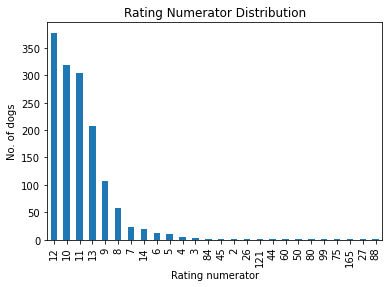

In [191]:
# Plotting a barchart to view the value count of the the dogs rating numerator
higher_denom['rating_numerator'].value_counts().plot(kind='bar', xlabel= 'Rating numerator', ylabel= 'No. of dogs', title= 'Rating Numerator Distribution');

The above histogram clearly shows the Rating numerator distribution. We can clearly see that ratings below 20 have a higher frequency 

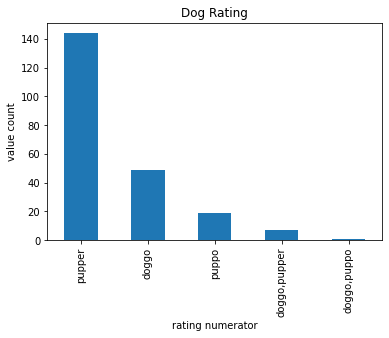

In [192]:
# Plotting a barchart to view the value count of the the dog stages
higher_denom['dog_stage'].value_counts().plot(kind='bar', xlabel= 'rating numerator', ylabel='value count', title= 'Dog Rating');

The above barchart clearly shows the Rating numerator distribution. We can clearly see that ratings below 20 have a higher frequency. Lots and lots of dog were rated below 20. while few had a higher rating.